In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Read the results from the csv file
monitor_paths = {
    # 'random_agent': [],
    'default_agent': ['zresults/pittsburgh_default_monitor.csv'],
    'MBRL_agent': [],
    'CLUE': ['zresults/pittsburgh_CLUE_monitor.csv'],
    'DT_agent (ours)': ['zresults/pittsburgh_tree_monitor.csv'],
}
# for i in range(50):
#     monitor_paths['random_agent'].append('zresults/pittsburgh_random_{}_monitor.csv'.format(i))

for i in range(10):
    monitor_paths['MBRL_agent'].append('zresults/pittsburgh_MBRL_{}_monitor.csv'.format(i))

print(monitor_paths)

{'default_agent': ['zresults/pittsburgh_default_monitor.csv'], 'MBRL_agent': ['zresults/pittsburgh_MBRL_0_monitor.csv', 'zresults/pittsburgh_MBRL_1_monitor.csv', 'zresults/pittsburgh_MBRL_2_monitor.csv', 'zresults/pittsburgh_MBRL_3_monitor.csv', 'zresults/pittsburgh_MBRL_4_monitor.csv', 'zresults/pittsburgh_MBRL_5_monitor.csv', 'zresults/pittsburgh_MBRL_6_monitor.csv', 'zresults/pittsburgh_MBRL_7_monitor.csv', 'zresults/pittsburgh_MBRL_8_monitor.csv', 'zresults/pittsburgh_MBRL_9_monitor.csv'], 'CLUE': ['zresults/pittsburgh_CLUE_monitor.csv'], 'DT_agent (ours)': ['zresults/pittsburgh_tree_monitor.csv']}


In [189]:
def get_violation_rate(monitor_path, comfort_lower, comfort_higher, start_timestep, end_timestep):
    monitor = pd.read_csv(monitor_path)
    violation_count = 0
    for i in range(start_timestep, end_timestep):
        if monitor['Zone People Occupant Count(SPACE1-1)'][i] > 0 and (monitor['Zone Air Temperature(SPACE1-1)'][i] < comfort_lower or monitor['Zone Air Temperature(SPACE1-1)'][i] > comfort_higher):
            violation_count += 1
    return violation_count / (end_timestep - start_timestep)

def get_total_power(monitor_path, start_timestep, end_timestep):
    monitor = pd.read_csv(monitor_path)
    total_power = 0
    for i in range(start_timestep, end_timestep):
        total_power += monitor['Facility Total HVAC Electricity Demand Rate(Whole Building)'][i]/4000
    return total_power

{'default_agent': [1263.6893300022314], 'MBRL_agent': [1128.4710165184829, 1128.3604680076967, 1128.4168210863465, 1128.077516470271, 1127.9718814476876, 1128.2228117440595, 1128.040748195746, 1127.9996151450973, 1128.1725836738724, 1127.9607172083602], 'CLUE': [1134.0766703530774], 'DT_agent (ours)': [1114.089394114159]}


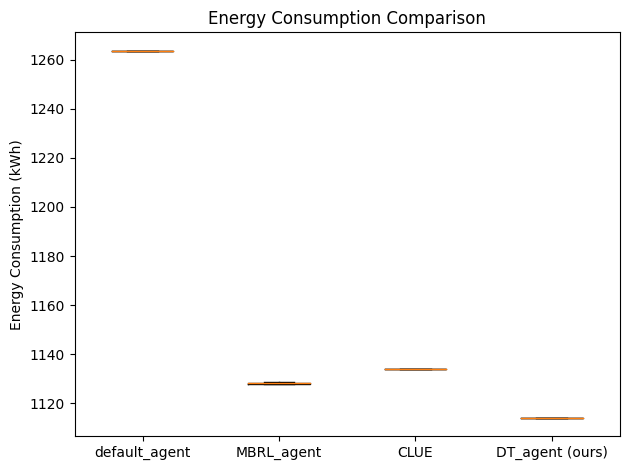

In [190]:
'''
plot energy comsumption comparison as a box chart.
if monitor_paths contains multiple paths, plot the mean and std.
'''
def plot_energy_comparison(monitor_paths):
    energy_consumption = {}
    for key in monitor_paths:
        energy_consumption[key] = []
        for path in monitor_paths[key]:
            energy_consumption[key].append(get_total_power(path, 0, 2976))
    print(energy_consumption)
    plt.boxplot(energy_consumption.values(), labels=energy_consumption.keys())
    plt.title('Energy Consumption Comparison')
    plt.ylabel('Energy Consumption (kWh)')
    plt.tight_layout()
    plt.show()

plot_energy_comparison(monitor_paths)


{'default_agent': [0.10349462365591398], 'MBRL_agent': [0.09509408602150538, 0.0967741935483871, 0.09576612903225806, 0.09543010752688172, 0.09744623655913978, 0.09475806451612903, 0.09543010752688172, 0.09475806451612903, 0.0967741935483871, 0.09643817204301075], 'CLUE': [0.08938172043010753], 'DT_agent (ours)': [0.08568548387096774]}


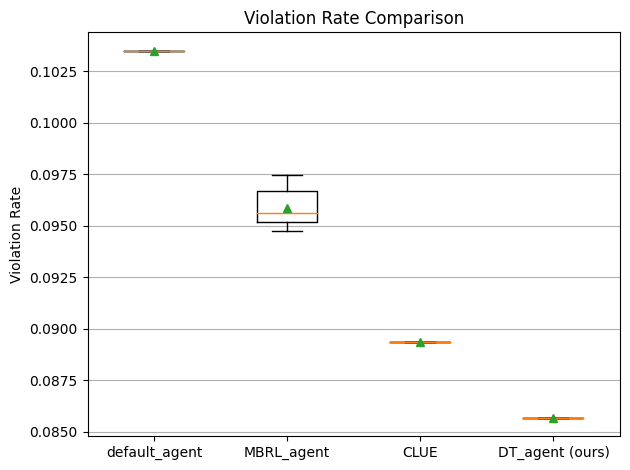

In [191]:
'''
plot violation rate comparison as a box chart.
if monitor_paths contains multiple paths, plot the mean, std, and min, max.
'''
def plot_violation_comparison(monitor_paths):
    violation_rates = {}
    for key in monitor_paths:
        violation_rates[key] = []
        for path in monitor_paths[key]:
            violation_rates[key].append(get_violation_rate(path, 20, 23.5, 0, 2976))
    print(violation_rates)
    fig, ax = plt.subplots()
    # plot the mean and std of box chart
    ax.boxplot(violation_rates.values(), labels=violation_rates.keys(), showmeans=True)
    ax.set_ylabel('Violation Rate')
    ax.set_title('Violation Rate Comparison')
    ax.yaxis.grid(True)
    fig.tight_layout()
    plt.show()

plot_violation_comparison(monitor_paths)

In [192]:
'''
compute performance gain
'''
default_vio = get_violation_rate(monitor_paths['default_agent'][0], 20, 23.5, 0, 2976)
CLUE_vio = get_violation_rate(monitor_paths['CLUE'][0], 20, 23.5, 0, 2976)
DT_vio = get_violation_rate(monitor_paths['DT_agent (ours)'][0], 20, 23.5, 0, 2976)

default_energy = get_total_power(monitor_paths['default_agent'][0], 0, 2976)
CLUE_energy = get_total_power(monitor_paths['CLUE'][0], 0, 2976)
DT_energy = get_total_power(monitor_paths['DT_agent (ours)'][0], 0, 2976)

default_energy_efficiency = default_vio / default_energy
CLUE_energy_efficiency = CLUE_vio / CLUE_energy
DT_energy_efficiency = DT_vio / DT_energy

CLUE_gain = default_vio - CLUE_vio
DT_gain = default_vio - DT_vio

CLUE_energy_gain = default_energy - CLUE_energy
DT_energy_gain = default_energy - DT_energy

print('CLUE gain: ', CLUE_gain)
print('DT gain: ', DT_gain)
print('CLUE energy gain: ', CLUE_energy_gain)
print('DT energy gain: ', DT_energy_gain)

print('DT more gain than CLUE: ', (DT_gain - CLUE_gain)/CLUE_gain)
print('DT more energy gain than CLUE: ', (DT_energy_gain - CLUE_energy_gain)/CLUE_energy_gain)


CLUE gain:  0.014112903225806453
DT gain:  0.01780913978494625
CLUE energy gain:  129.612659649154
DT energy gain:  149.59993588807242
DT more gain than CLUE:  0.26190476190476264
DT more energy gain than CLUE:  0.15420774709061277


{'default_agent': [0.10349462365591398], 'MBRL_agent': [0.09509408602150538, 0.0967741935483871, 0.09576612903225806, 0.09543010752688172, 0.09744623655913978, 0.09475806451612903, 0.09543010752688172, 0.09475806451612903, 0.0967741935483871, 0.09643817204301075], 'CLUE': [0.08938172043010753], 'DT_agent (ours)': [0.08568548387096774]}
{'default_agent': [1263.6893300022314], 'MBRL_agent': [1128.4710165184829, 1128.3604680076967, 1128.4168210863465, 1128.077516470271, 1127.9718814476876, 1128.2228117440595, 1128.040748195746, 1127.9996151450973, 1128.1725836738724, 1127.9607172083602], 'CLUE': [1134.0766703530774], 'DT_agent (ours)': [1114.089394114159]}


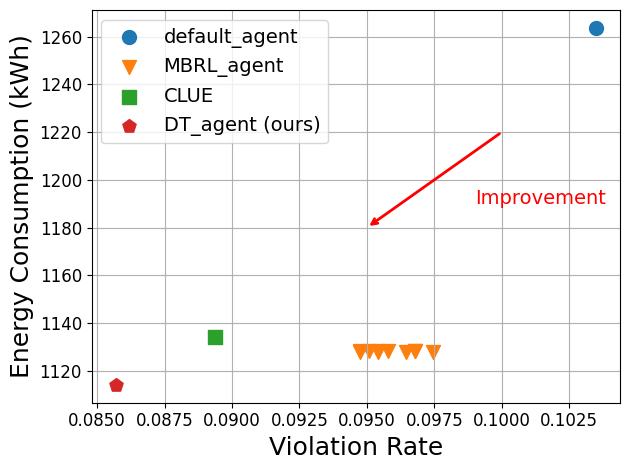

In [193]:
'''
Plot energy consumption and violation rate in one figure.
X is the violation rate, Y is the energy consumption.
Each data point represents the result from one monitor file.
Use different kind of markers to represent different agents.
'''
def plot_pareto_graph(monitor_paths):
    violation_rates = {}
    energy_consumption = {}
    for key in monitor_paths:
        violation_rates[key] = []
        energy_consumption[key] = []
        for path in monitor_paths[key]:
            violation_rates[key].append(get_violation_rate(path, 20, 23.5, 0, 2976))
            energy_consumption[key].append(get_total_power(path, 0, 2976))
    print(violation_rates)
    print(energy_consumption)
    fig, ax = plt.subplots()
    markers = ['o', 'v', 's', 'p', 'P', '*', 'h', 'H', 'D', 'd', 'X', 'x']
    for i, key in enumerate(monitor_paths):
        ax.scatter(violation_rates[key], energy_consumption[key], marker=markers[i], label=key, s=100)
    ax.legend(fontsize=14)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(12)
    ax.set_xlabel('Violation Rate', fontsize=18)
    ax.set_ylabel('Energy Consumption (kWh)', fontsize=18)
    ax.grid(True)

    # draw an red thick arrow to indicate the direction of improvement
    ax.annotate('', xy=(0.1, 1220), xycoords='data',
                xytext=(0.095, 1180), textcoords='data', 
                arrowprops=dict(arrowstyle="<-", connectionstyle="arc3", color='red', linewidth=2))
    # annotate the arrow with text
    ax.text(0.099, 1190, 'Improvement', fontsize=14, color='red')

    fig.tight_layout()
    # save to pdf
    plt.savefig('pareto_graph.pdf')
    plt.show()

plot_pareto_graph(monitor_paths)

[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 22.00000000000004, 21.99999999999999, 15.0, 22.00000000000001, 16.0, 16.0, 16.0, 16.0, 17.0, 15.0, 20.0, 16.0, 17.0, 17.0, 15.0, 15.0, 17.0, 18.0, 16.0, 16.0, 17.0, 17.0, 17.0, 15.0, 17.0, 15.0, 19.0, 20.0, 15.0, 18.0, 19.0, 15.0, 16.0, 15.0, 15.0, 15.0, 15.0, 17.0, 17.0, 20.0, 16.0, 20.0, 18.0, 18.0, 19.0, 22.0, 18.0, 22.0, 15.0, 16.0, 20.0, 20.0, 22.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 15.0, 15.0, 16.0, 16.0, 17.0, 15.0, 15.0,

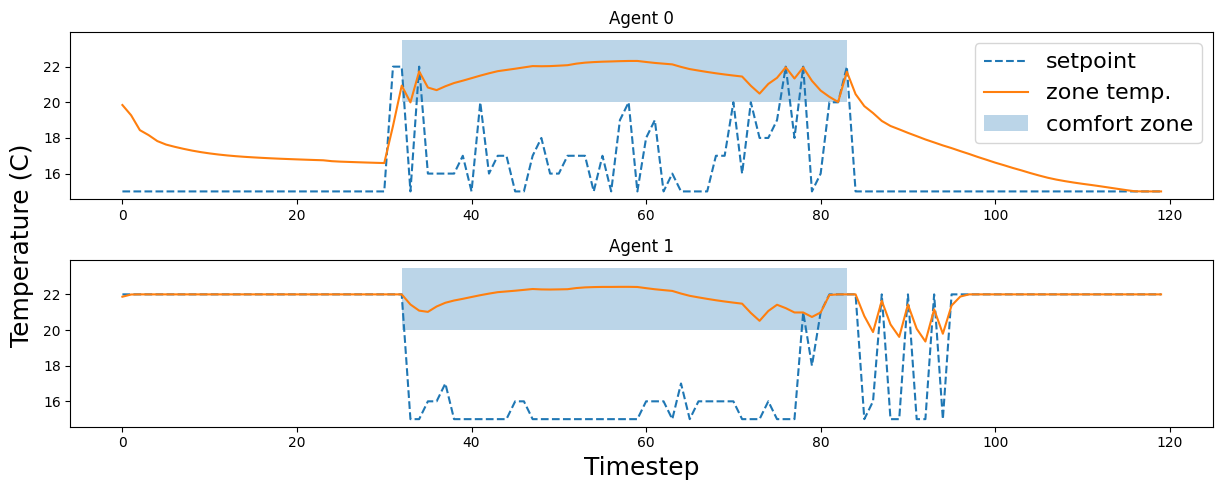

In [194]:
# plot the actions of MBRL agent
def plot_actions(monitor_path, steps=120):
    if type(monitor_path) != list:
        monitor = pd.read_csv(monitor_path)
        actions = []
        temp = []
        people = []
        for i in range(steps):
            actions.append(monitor['Zone Thermostat Heating Setpoint Temperature(SPACE1-1)'][i])
            temp.append(monitor['Zone Air Temperature(SPACE1-1)'][i])
            people.append(monitor['Zone People Occupant Count(SPACE1-1)'][i])
        # figure size
        plt.figure(figsize=(15, 5))
        plt.plot(actions,'--', label='setpoint')
        plt.plot(temp, label='zone temp.')
        # fill between 20 to 23.5 at x = 32 to 84
        plt.fill_between(range(32, 84), 20, 23.5, alpha=0.3, label='comfort zone')
        plt.ylabel('Temperature (C)')
        plt.xlabel('Timestep')
        plt.legend()
        plt.show()
    else:
        # plot multiple graphs and put them horizontally
        fig, axs = plt.subplots(len(monitor_path), 1, figsize=(12, 5))
        for i, path in enumerate(monitor_path):
            monitor = pd.read_csv(path)
            actions = []
            temp = []
            people = []
            for j in range(steps):
                actions.append(monitor['Zone Thermostat Heating Setpoint Temperature(SPACE1-1)'][j])
                temp.append(monitor['Zone Air Temperature(SPACE1-1)'][j])
                people.append(monitor['Zone People Occupant Count(SPACE1-1)'][j])
            print(actions)
            axs[i].plot(actions, '--', label='setpoint')
            axs[i].plot(temp, label='zone temp.')
            axs[i].fill_between(range(32, 84), 20, 23.5, alpha=0.3, label='comfort zone')
            axs[i].set_title('Agent {}'.format(i))
            # no x label for all subplots
            # axs[i].set_ylabel('Temperature (C)', fontsize=18)
            # axs[i].set_xlabel('Timestep', fontsize=18)
            # axs[i].legend()
        # legend font size
        axs[0].legend(fontsize=16)
        # a single y label for all subplots
        fig.text(-0.015, 0.5, 'Temperature (C)', va='center', rotation='vertical', fontsize=18)
        plt.xlabel('Timestep', fontsize=18)
        plt.tight_layout()

plot_actions(['zresults/pittsburgh_MBRL_0_monitor.csv', 
              'zresults/pittsburgh_tree_monitor.csv'], steps=120)

[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 22.00000000000004, 21.99999999999999, 15.0, 22.00000000000001, 16.0, 16.0, 16.0, 16.0, 17.0, 15.0, 20.0, 16.0, 17.0, 17.0, 15.0, 15.0, 17.0, 18.0, 16.0, 16.0, 17.0, 17.0, 17.0, 15.0, 17.0, 15.0, 19.0, 20.0, 15.0, 18.0, 19.0, 15.0, 16.0, 15.0, 15.0, 15.0, 15.0, 17.0, 17.0, 20.0, 16.0, 20.0, 18.0, 18.0, 19.0, 22.0, 18.0, 22.0, 15.0, 16.0, 20.0, 20.0, 22.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 22.00000000000004, 21.99999999999999, 16.0, 22.00000000000001, 16.0, 15.0, 16.0, 15.0, 16.0, 21.0, 20.0, 15.0, 19.0, 17.0, 15.0, 15.0, 15.0, 19.0, 15.0, 18.0, 15.0, 16.0, 16.0, 17.0, 17.0, 17.0, 16

/var/folders/0c/2g7j374s11x2hp9r1gxjscfm0000gn/T/ipykernel_98720/3296263939.py:48: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


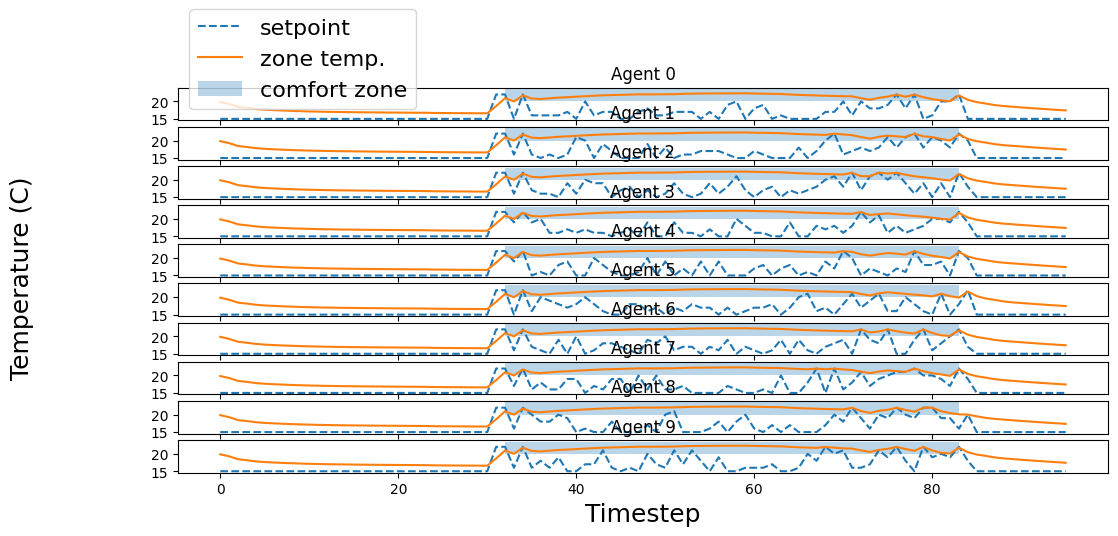

In [195]:
plot_actions(monitor_paths['MBRL_agent'], 96)

[0.0007081239692222115, 0.0007513238722321062, 0.0008166250137121131, 0.0008190992573497156, 0.0008179443629725485, 0.000826996883650645, 0.0008239554343547477, 0.0008245990963562638, 0.000822891789919687, 0.0008190371704377042, 0.0008231549659623359, 0.0008163184971455799, 0.0008179969760570419, 0.000820215700341476, 0.0008234398141847766, 0.0008177016274120342, 0.00082462678228134, 0.0008255708274401409, 0.0008221311320056663, 0.0008256003280476149, 0.0008218198455330392, 0.0008217930509970456, 0.0008218266114224845, 0.0008225647123698422, 0.0008203790363729114, 0.0008201369621456883, 0.0008191922715021229, 0.0008233341274801955, 0.0008191135656888337, 0.0008242313581771673, 0.0008201762792753664, 0.0008212265285752199, 0.000824358132511523, 0.0008194200440409721, 0.0008225862101704153, 0.0008210266923186844, 0.0008229286177100137, 0.0008216488595010438, 0.0008207302972349941, 0.0008204452126544772, 0.0008221888954422107, 0.0008188410853086128, 0.000820977372488366, 0.000820048679401

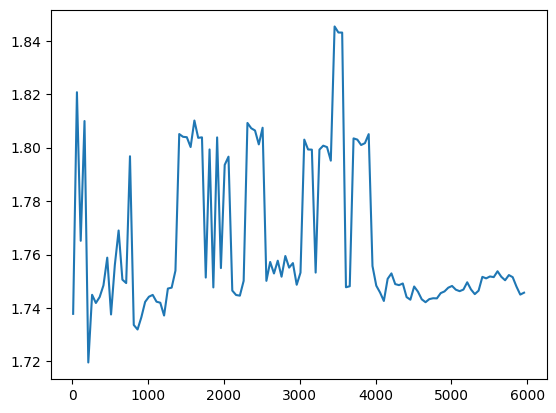

In [196]:
size = list(range(10, 6000, 50))
pittsburgh_power = []
pittsburgh_violation = []

for i in size:
    pittsburgh_power.append(get_total_power('zresults/pittsburgh_tree_monitor_{}.csv'.format(i), 0, 2976))
    pittsburgh_violation.append(get_violation_rate('zresults/pittsburgh_tree_monitor_{}.csv'.format(i), 20, 23.5, 0, 2976))

pittsburgh_energy_efficiency = []
for i in range(len(pittsburgh_power)):
    pittsburgh_energy_efficiency.append((1-pittsburgh_violation[i]) / pittsburgh_power[i])

# size is a list resulting from range(10, 6000, 50)
tucson_power = []
tucson_violation = []

for i in size:
    tucson_power.append(get_total_power('zresults/tucson_tree_monitor_{}.csv'.format(i), 0, 2976))
    tucson_violation.append(get_violation_rate('zresults/tucson_tree_monitor_{}.csv'.format(i), 20, 23.5, 0, 2976))

tucson_energy_efficiency = []
for i in range(len(tucson_power)):
    tucson_energy_efficiency.append((1-tucson_violation[i]) / tucson_power[i])

print(pittsburgh_energy_efficiency)
print(tucson_energy_efficiency)

for i in range(len(pittsburgh_energy_efficiency)):
    pittsburgh_energy_efficiency[i] = pittsburgh_energy_efficiency[i] * 1000

for i in range(len(tucson_energy_efficiency)):
    tucson_energy_efficiency[i] = tucson_energy_efficiency[i] * 1000

plt.plot(size, tucson_energy_efficiency, label='Tucson')

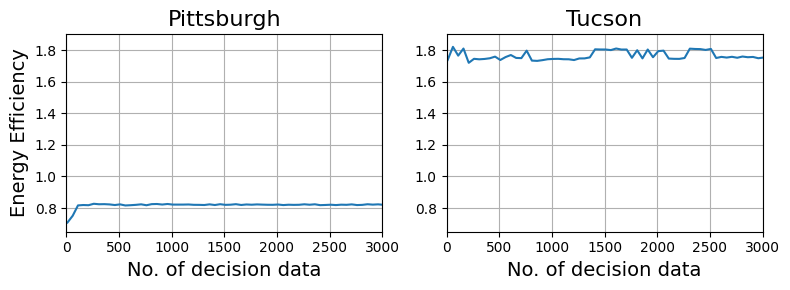

In [206]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[1].grid(True)
ax[0].grid(True)

ax[0].set_title('Pittsburgh', fontsize=16)
ax[1].set_title('Tucson', fontsize=16)

ax[0].plot(size, pittsburgh_energy_efficiency, label='Energy Efficiency')
ax[1].plot(size, tucson_energy_efficiency, label='Energy Efficiency')

ax[0].set_xlabel('No. of decision data', fontsize=14)
ax[1].set_xlabel('No. of decision data', fontsize=14)
ax[0].set_ylabel('Energy Efficiency', fontsize=14)

ax[0].set_ylim(0.65, 1.9)
ax[1].set_ylim(0.65, 1.9)

ax[0].set_xlim(0, 3000)
ax[1].set_xlim(0, 3000)

# handle1, label1 = ax[0].get_legend_handles_labels()

# lgd = fig.legend(handle1, label1, loc='lower center', bbox_to_anchor=(0.5, -0.08), ncol=4, fontsize=12)

# tight layout
plt.tight_layout()

fig.savefig('data_efficiency.pdf', bbox_inches='tight', dpi=300)

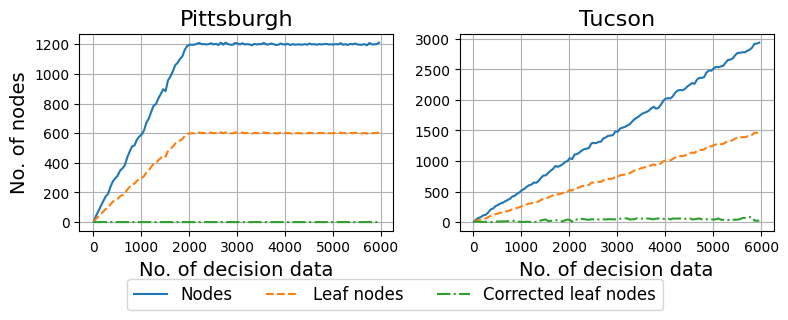

In [198]:
test_pittsburgh = pd.read_csv('test_data_pittsburgh.csv')
test_tucson = pd.read_csv('test_data_tucson.csv')

fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[1].grid(True)
ax[0].grid(True)

ax[0].set_title('Pittsburgh', fontsize=16)
ax[1].set_title('Tucson', fontsize=16)

ax[0].plot(size, test_pittsburgh['nodes'], label='Nodes')
ax[1].plot(size, test_tucson['nodes'], label='Nodes')

ax[0].plot(size, test_pittsburgh['leaf_nodes'], label='Leaf nodes', linestyle='--')
ax[1].plot(size, test_tucson['leaf_nodes'], label='Leaf nodes', linestyle='--')

pittsburgh_total_correction = []
tucson_total_correction = []

for i in range(len(test_pittsburgh['nodes'])):
    pittsburgh_total_correction.append(test_pittsburgh['correction_too_cold'][i] + test_pittsburgh['correction_too_warm'][i])
    tucson_total_correction.append(test_tucson['correction_too_cold'][i] + test_tucson['correction_too_warm'][i])

ax[0].plot(size, pittsburgh_total_correction, label='Corrected leaf nodes', linestyle='-.')
ax[1].plot(size, tucson_total_correction, label='Corrected leaf nodes', linestyle='-.')

ax[0].set_xlabel('No. of decision data', fontsize=14)
ax[1].set_xlabel('No. of decision data', fontsize=14)
ax[0].set_ylabel('No. of nodes', fontsize=14)

# handle1, label1 = ax[0].get_legend_handles_labels()

# lgd = fig.legend(handle1, label1, loc='lower center', bbox_to_anchor=(0.5, -0.08), ncol=4, fontsize=12)

# tight layout

handle1, label1 = ax[0].get_legend_handles_labels()

lgd = fig.legend(handle1, label1, loc='lower center', bbox_to_anchor=(0.5, -0.08), ncol=4, fontsize=12)

# tight layout
plt.tight_layout()

fig.savefig('data_efficiency_2.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)